In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

EDA

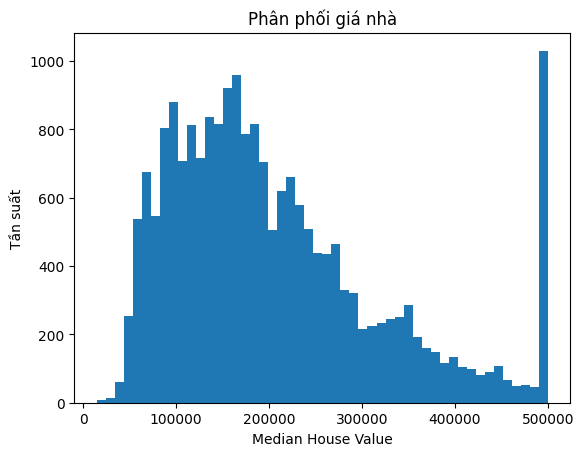

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['median_house_value'], bins=50)
plt.title('Phân phối giá nhà')
plt.xlabel('Median House Value')
plt.ylabel('Tần suất')
plt.show()


In [9]:
counts = data['ocean_proximity'].value_counts()
print(counts)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


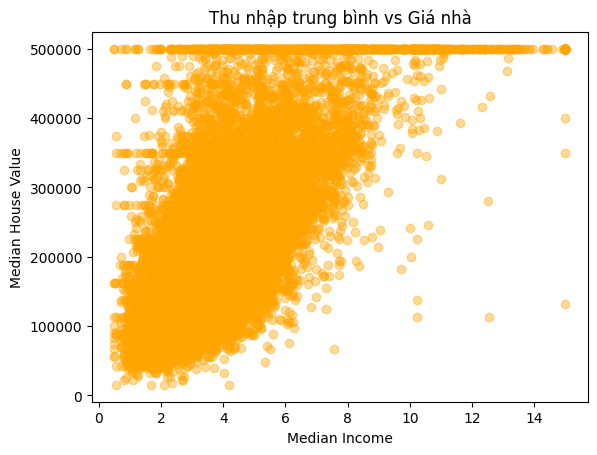

In [10]:
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.4, color='orange')
plt.title('Thu nhập trung bình vs Giá nhà')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

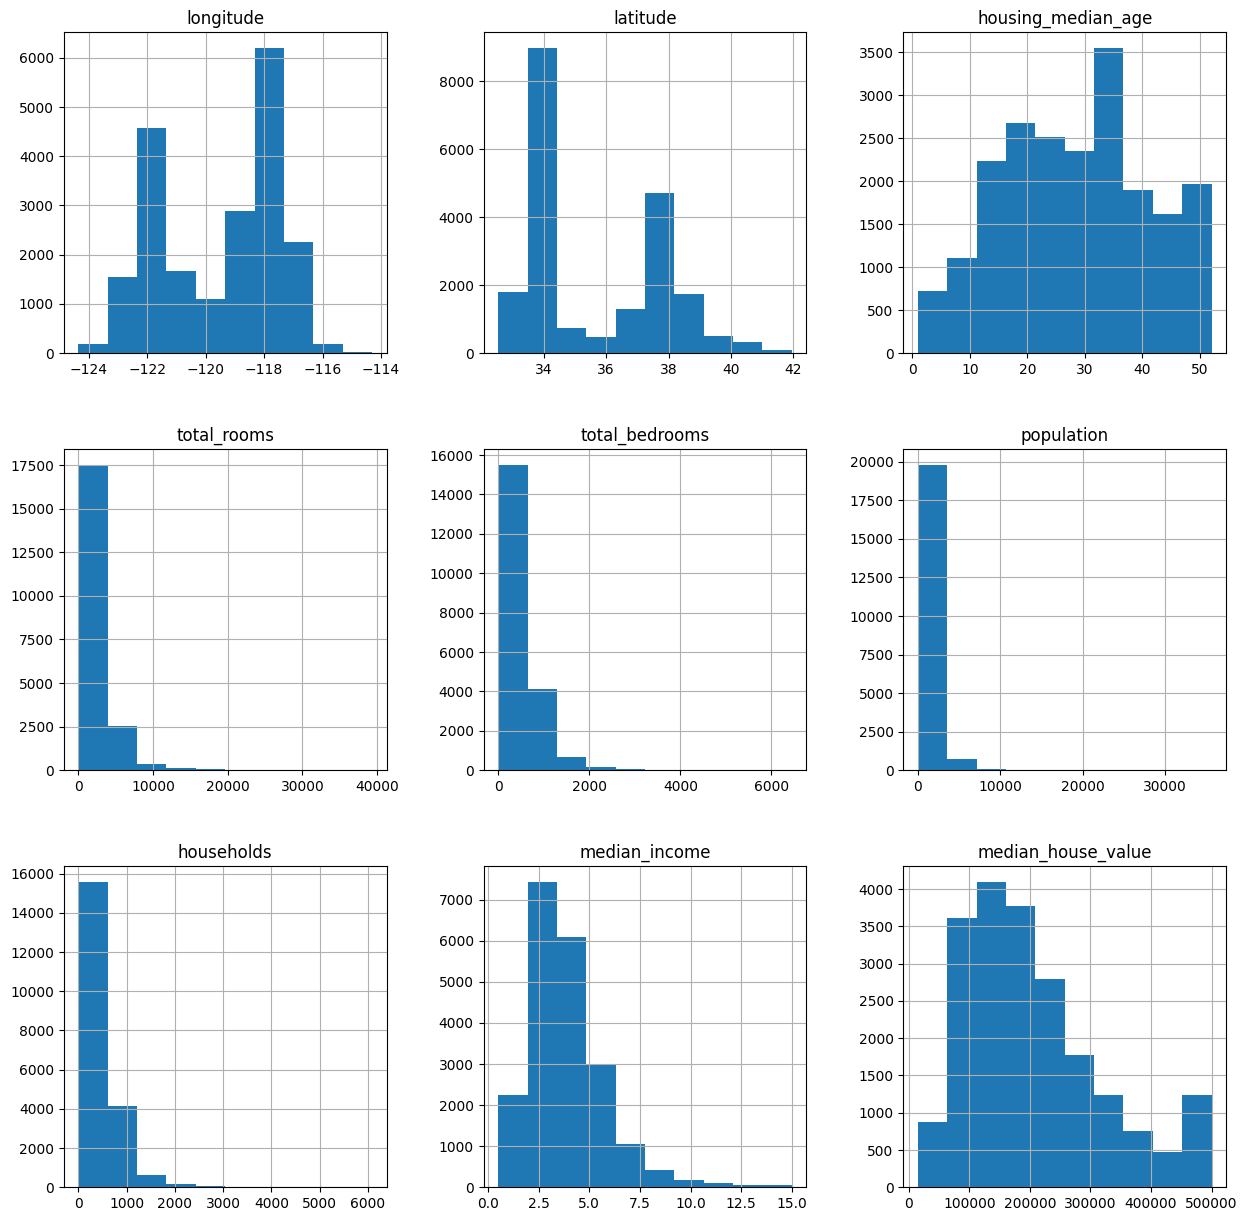

In [11]:
data.hist(figsize=(15, 15))

In [12]:
mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
data['ocean_proximity'] = data['ocean_proximity'].map(mapping)

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)  
y = data['median_house_value']             

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   
    random_state=42  
)

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,            
    min_samples_split=10,     
    min_samples_leaf=4,  
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = model.predict(X_test)

In [ ]:
Evaluate

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


MSE: 2553351574.61
RMSE: 50530.70
MAE: 32471.42
R2 Score: 0.81


In [18]:
y_pred = model.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))

Training Score:  0.9171429996015777
Testing Score:  0.8051484981400321


In [20]:
import pickle

# Sau khi train xong model
with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)
